# Anomaly Detection Analysis


In [1]:
import pandas as pd
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
file_path = 'demographic.csv'
data = pd.read_csv(file_path)

In [16]:
# Select attributes for analysis
selected_columns = ['RIDAGEYR', 'DMDHHSIZ', 'INDHHIN2']
data_selected = data[selected_columns].dropna()

# Normalize data using Z-Score
z_scores = data_selected.apply(zscore)

1. The Z-Score method identifies anomalies by calculating how far each data point deviates from the mean in terms of standard deviations. For each attribute, the algorithm calculates the mean and standard deviation. Then, it computes the Z-Score for each data point using the formula Z = (x−μ)/σ, where x is the value, μ is the mean, and σ is the standard deviation. Data points with absolute Z-Scores greater than a chosen threshold (commonly 3) are flagged as anomalies. This process is simple and works best for normally distributed data.

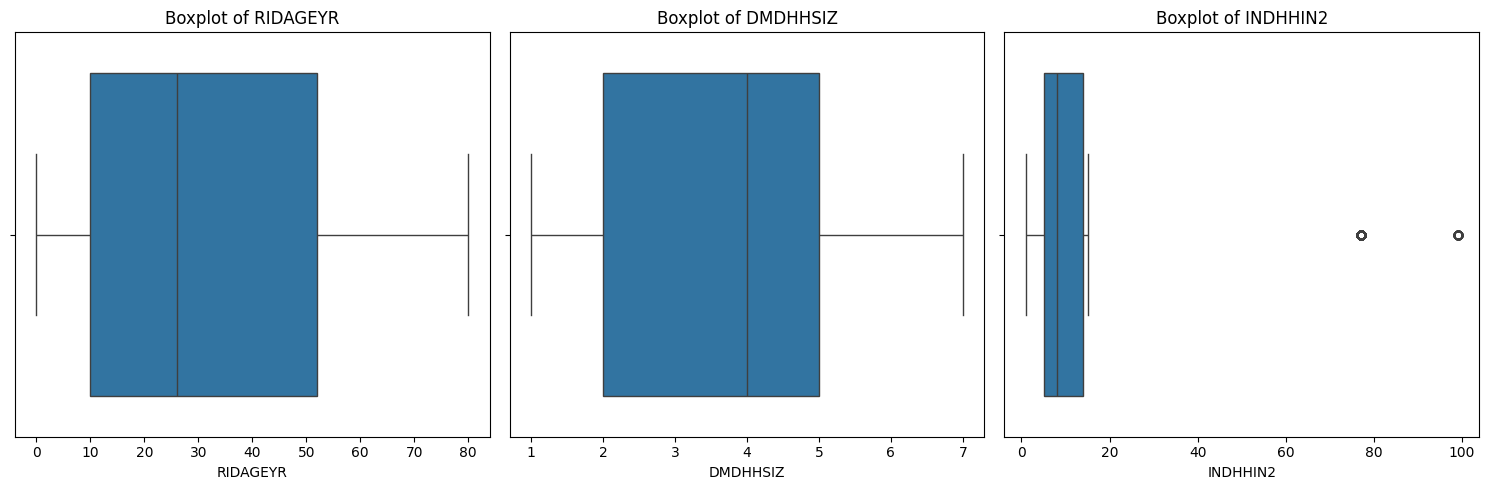

Anomaly Counts (Z-Score Method):
RIDAGEYR      0
DMDHHSIZ      0
INDHHIN2    327
dtype: int64


In [19]:
# 2. Z-Score Method Implementation
# Identify anomalies (Z-Score > 3 or < -3)
anomalies = (z_scores.abs() > 3)
anomaly_counts = anomalies.sum()

# Visualize anomalies using boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, column in enumerate(selected_columns):
    sns.boxplot(data=data_selected, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

print("Anomaly Counts (Z-Score Method):")
print(anomaly_counts)

3. Yes, the method flagged 327 anomalies in the INDHHIN2 column. Examples might include unusually high income values or misrecorded data.
4. The anomalies in INDHHIN2 could result from:

* Capped or Placeholder Values: Household income values like "99.0" could signify missing or imputed data rather than actual income.
* Genuine Outliers: Extreme income values that significantly exceed or fall below the typical range for the dataset.
* Non-Normal Distribution: Income data often follows a skewed distribution, making Z-Score assumptions less reliable for this column.

## Extra Credit

1. Isolation Forest isolates data points by randomly selecting attributes and splitting values. Anomalies are more likely to be isolated in fewer splits due to their distinct characteristics. The algorithm assigns an anomaly score to each point based on the average number of splits required to isolate it. Points with high anomaly scores are flagged.

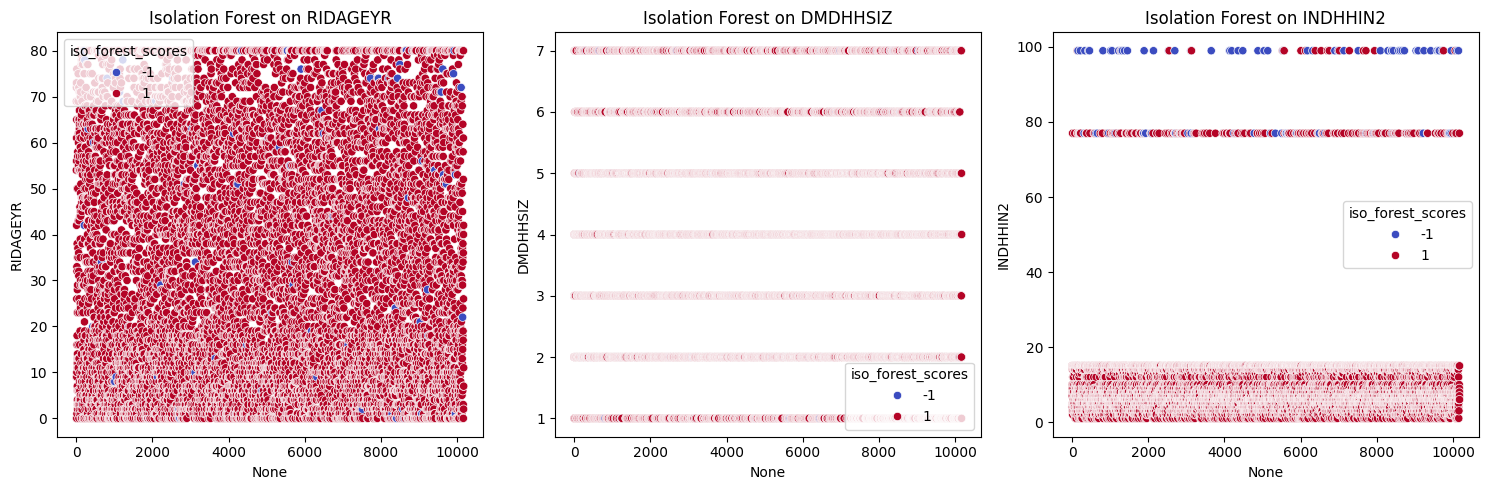

Number of anomalies detected by Isolation Forest: 101
Sample anomalies detected by Isolation Forest:
     RIDAGEYR  DMDHHSIZ  INDHHIN2
156         3         5      99.0
212        42         1      77.0
217        80         2      99.0
223        78         2      77.0
315        63         7      77.0


In [18]:
# 2. Isolation Forest Implementation
# Implement Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)
data_selected['iso_forest_scores'] = iso_forest.fit_predict(data_selected[selected_columns])

# Identify anomalies (score = -1 indicates anomaly)
iso_anomalies = data_selected[data_selected['iso_forest_scores'] == -1]

# Visualize anomalies using scatterplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
for i, column in enumerate(selected_columns):
    sns.scatterplot(data=data_selected, x=data_selected.index, y=column,
                    hue='iso_forest_scores', palette="coolwarm", ax=axes[i])
    axes[i].set_title(f'Isolation Forest on {column}')
plt.tight_layout()
plt.show()

print(f"Number of anomalies detected by Isolation Forest: {len(iso_anomalies)}")
print("Sample anomalies detected by Isolation Forest:")
print(iso_anomalies[selected_columns].head())

3. Yes, 101 anomalies were detected. Sample anomalies include a 3-year-old with a household size of 5 and household income reported as "99.0" and 78-year-old with a household size of 2 and income "77.0".
4. Upon investigation, this could have been caused by:

* Misreported or Extreme Data Values: Household income
coded as "99.0", possibly indicating missing data.
* Outliers: An unusually large household size (e.g., 7 members for a 63-year-old respondent).
* Rare but valid scenarios: A large household or very young respondents with unusually high or low incomes.